Using `ECOv002-CMR` package to retrieve ECOSTRESS granules as inputs using the Common Metadata Repository (CMR) API. Using `ECOv002-L2T-STARS` package to run the product generating executable (PGE).

In [1]:
import numpy as np
from ECOv002_CMR import download_ECOSTRESS_granule
from ECOv002_L2T_STARS import generate_L2T_STARS_runconfig, L2T_STARS

Disable logger output in notebook

In [2]:
import logging

logging.getLogger().handlers = []

Set working directory

In [8]:
working_directory = "data"

Retrieve LST LSTE granule from CMR API for target date

In [ ]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=35800,
    scene=3,
    tile="11SPS", 
    aquisition_date="2024-10-29",
    parent_directory=working_directory
)

L2T_LSTE_granule

--2024-11-11 15:59:36--  https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/ECO_L2T_LSTE.002/ECOv002_L2T_LSTE_35800_003_11SPS_20241029T075947_0713_01/ECOv002_L2T_LSTE_35800_003_11SPS_20241029T075947_0713_01_water.tif
Resolving data.lpdaac.earthdatacloud.nasa.gov (data.lpdaac.earthdatacloud.nasa.gov)... 18.154.144.127, 18.154.144.29, 18.154.144.103, ...
Connecting to data.lpdaac.earthdatacloud.nasa.gov (data.lpdaac.earthdatacloud.nasa.gov)|18.154.144.127|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://urs.earthdata.nasa.gov/oauth/authorize?client_id=FtSFfbOeuxDcdf4px-elGw&response_type=code&redirect_uri=https://data.lpdaac.earthdatacloud.nasa.gov/login&state=%2Flp-prod-protected%2FECO_L2T_LSTE.002%2FECOv002_L2T_LSTE_35800_003_11SPS_20241029T075947_0713_01%2FECOv002_L2T_LSTE_35800_003_11SPS_20241029T075947_0713_01_water.tif&app_type=401 [following]
--2024-11-11 15:59:36--  https://urs.earthdata.nasa.gov/oauth/authorize?client_id=FtSFfbOeu

L2TLSTE("/Users/gregoryhalverson/Projects/ECOv002-L2T-STARS/data/ECOv002_L2T_LSTE_35800_003_11SPS_20241029T075947_0713_01")

Load and display preview of surface temperature

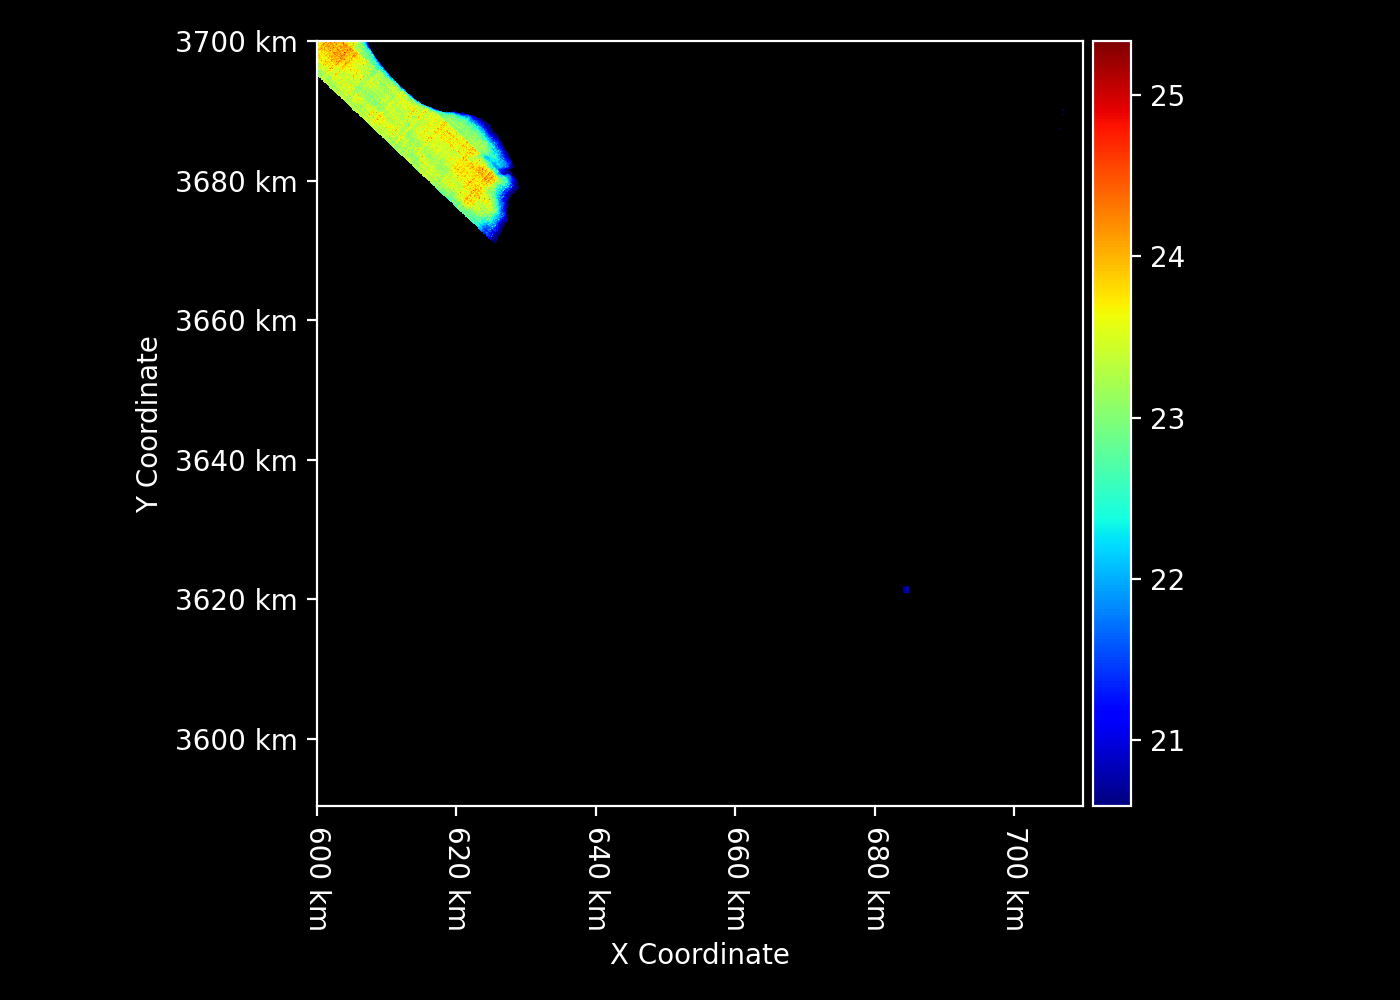

In [4]:
L2T_LSTE_granule.ST_C

Retrieve L2T STARS granule from CMR API as prior

In [ ]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_STARS_granule

L2TSTARS("/Users/gregoryhalverson/Projects/ECOv002-L2T-STARS/data/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

Load and display preview of vegetation index

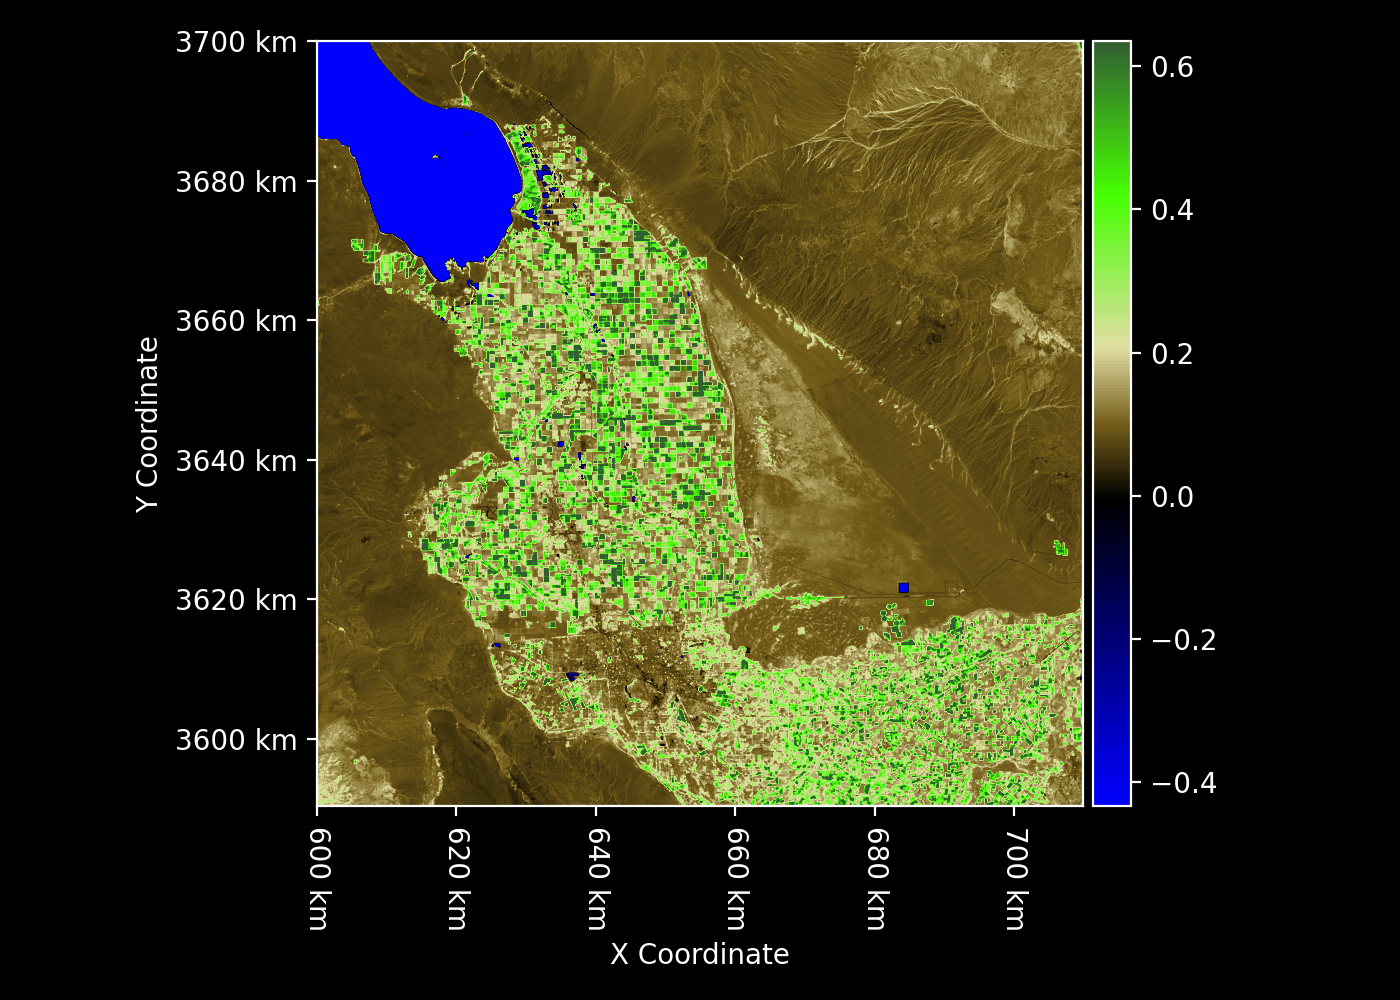

In [6]:
L2T_STARS_granule.NDVI

Generate XML run-config file for L2T STARS PGE run

In [ ]:
runconfig_filename = generate_L2T_STARS_runconfig(
    L2T_LSTE_filename=L2T_LSTE_granule.product_filename,
    prior_L2T_STARS_filename=L2T_STARS_granule.product_filename,
    working_directory=working_directory
)

runconfig_filename

NameError: name 'working_directory' is not defined

In [ ]:
with open(runconfig_filename, "r") as f:
    print(f.read())

In [ ]:
exit_code = L2T_STARS(runconfig_filename=runconfig_filename)
exit_code